<a href="https://colab.research.google.com/github/Shyamala-DS/DeepLearning-Projects/blob/main/LinearRegression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/MLData/Salary_Data.csv')

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Text(0, 0.5, 'Salary')

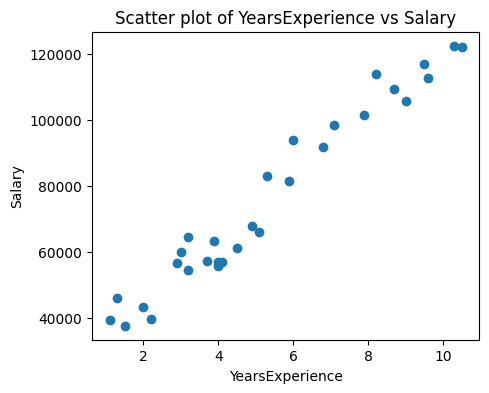

In [ ]:
# Scatter plots
plt.figure(figsize=(5, 4))

plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.title('Scatter plot of YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [ ]:
X = dataset['YearsExperience'].values
y = dataset['Salary'].values

In [ ]:
X = np.column_stack((np.ones(X.shape[0]), X))

In [ ]:
# 1. Compute X^T (transpose of X)
X_transpose = X.T

# 2. Compute X^T X
X_transpose_X = np.dot(X_transpose, X)

# 3. Compute the inverse of X^T X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# 4. Compute X^T y
X_transpose_y = np.dot(X_transpose, y)

# 5. Compute beta_hat
beta_hat = np.dot(X_transpose_X_inv, X_transpose_y)

In [ ]:
beta_hat

array([25792.20019867,  9449.96232146])

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Extract the estimated coefficients
beta_hat = model.params
print("OLS estimates (beta_hat):")
print(beta_hat)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.14e-20
Time:                        05:47:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
#print(X)
## always the data "X" should be of 2D array
X = dataset['YearsExperience'].values.reshape(-1, 1)
#print(X.shape)
#print(y.shape)
y = dataset['Salary'].values
# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Print the coefficients
print(f"Intercept: {lin_reg.intercept_}")
print(f"Slope: {lin_reg.coef_[0]}")

Intercept: 25792.200198668696
Slope: 9449.962321455076


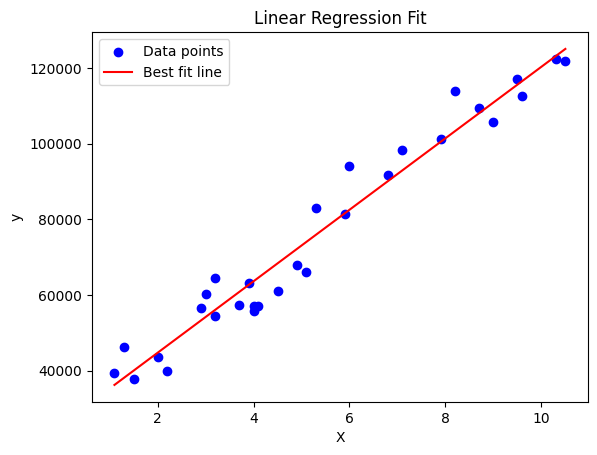

In [ ]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Best fit line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
xmin=X.min()
xmax=X.max()
xmin,xmax

(1.1, 10.5)

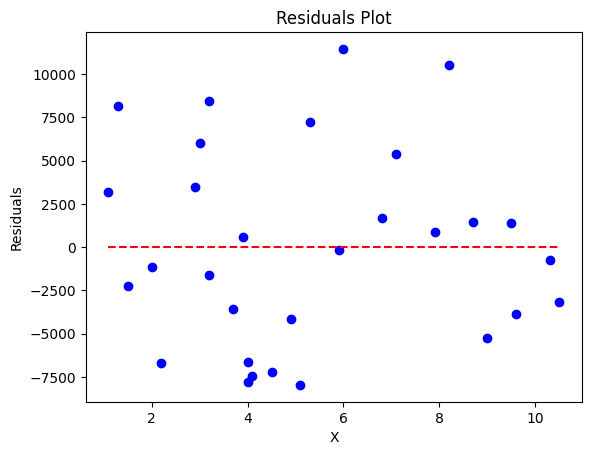

In [ ]:
# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.hlines(y=0, xmin=X.min(), xmax=X.max(), colors='red', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


Residuals Plot:

    The blue points represent the residuals (differences between observed values and predicted values).
    The red dashed line at y=0 serves as a reference to indicate where residuals would be if predictions were perfect.

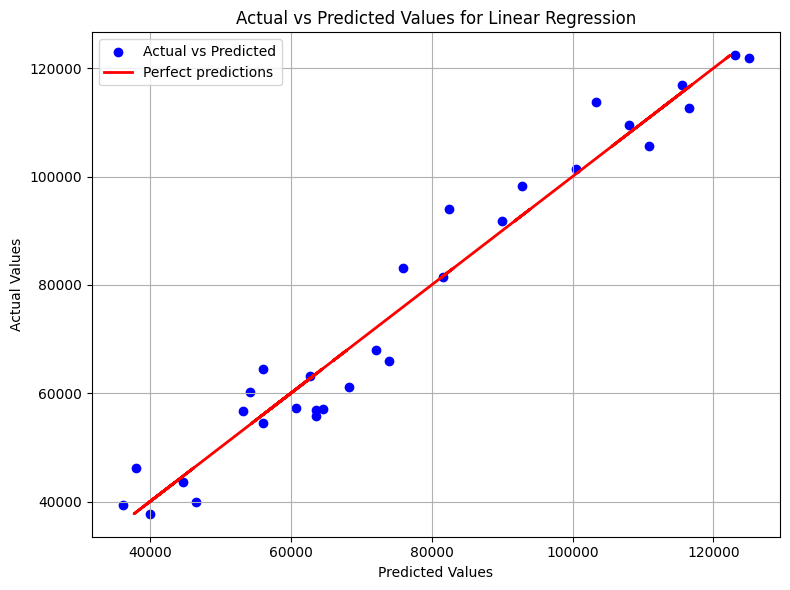

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y, color='blue', label='Actual vs Predicted')

# Add diagonal line for perfect predictions
plt.plot(y, y, color='red', linestyle='-', linewidth=2, label='Perfect predictions')

# Customize plot labels and title
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluation metrics for Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

In [ ]:
print(mse)

31270951.722280964


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R2)
r2 = r2_score(y, y_pred)
print(f"R-squared (R2): {r2}")

# Adjusted R-squared
n = len(y)
p = 1  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Mean Squared Error (MSE): 31270951.722280964
Root Mean Squared Error (RMSE): 5592.043608760661
Mean Absolute Error (MAE): 4644.2012894435375
R-squared (R2): 0.9569566641435086
Adjusted R-squared: 0.9554194021486339


## Multiple Linear Regression


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['HousePrice']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

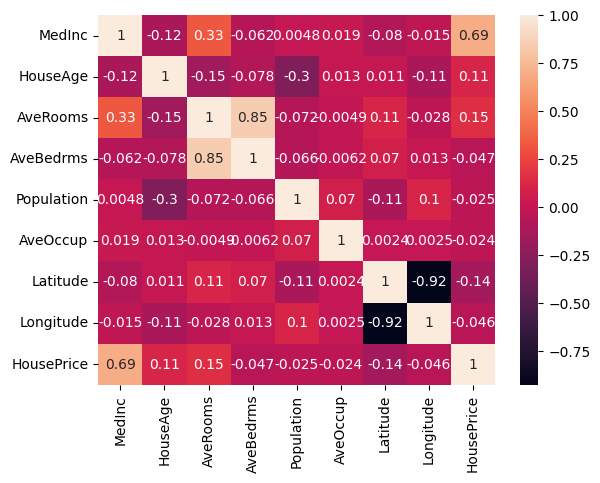

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
X_constant = sm.add_constant(housing.data)
model = sm.OLS(housing.target, housing.data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                        0.00
Time:                        05:47:14   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5135      0.004    120.594      0.000       0.505       0.522
x2             0.0157      0.000     33.727      0.000       0.015       0.017
x3            -0.1825      0.006    -29.673      0.000      -0.195      -0.170
x4             0.8651      0.030     28.927      0.000       0.806       0.924
x5          7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
x6            -0.0047      0.001     -8.987      0.000      -0.006      -0.004
x7            -0.0639      0.004    -17.826      0.000      -0.071      -0.057
x8            -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X= df.drop('HousePrice',axis=1)
y=df['HousePrice']

In [ ]:
X.shape

(20640, 8)

In [ ]:
X = add_constant(X)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


In [ ]:

vif_data = pd.DataFrame()
x=df.drop(['HousePrice'],axis=1)
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [ ]:
df1 = df[['HouseAge','Population','AveOccup']]

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:

from sklearn.model_selection import train_test_split
X=df.drop('HousePrice',axis=1)
y=df['HousePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5558915986952442


In [ ]:
y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train):", mse_train)

Mean Squared Error (Train): 0.5179331255246699


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train):", mse_train)

Mean Squared Error (Train): 0.5179331255246699


In [ ]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [ ]:
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HousePrice   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        05:47:15   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.000     -38.451     -35.596
MedInc         0.4487      0.005     95.697      0.000       0.439       0.458
HouseAge       0.0097      0.000     19.665      0.000       0.009       0.011
AveRooms      -0.1233      0.007    -18.677      0.000      -0.136      -0.110
AveBedrms      0.7831      0.033     23.556      0.000       0.718       0.848
Population  -2.03e-06   5.25e-06     -0.387      0.699   -1.23e-05    8.26e-06
AveOccup      -0.0035      0.000     -7.253      0.000      -0.004      -0.003
Latitude      -0.4198      0.008    -52.767      0.000      -0.435      -0.404
Longitude     -0.4337      0.008    -52.117      0.000      -0.450      -0.417
==============================================================================
Omnibus:                     3333.187   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9371.466
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       6.006   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Gradient Descent:

 * To minimize the error we need best set of coefficients to minimize the error.
 * One issue with the OLS is Time complexity to find the best values of theta is more and to predict the "target" values is more.
 * As the number of features increases the complexity of calculation also increases as training the data with OLS will also increase.

 To overcome all these we go for Gradient descent technique.




In [ ]:
from sklearn.linear_model import SGDRegressor

SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)


* max_iter : says stop the alg when it reaches that many iterations
* tol : tells stop when the error reaches to that value i.e the difference b/w previous and current error
* penalty:
* eta0 : learning rate
* n_iter_no_change : if there is no change in the coefficients then also we will stop the alg

In [ ]:
sgd_regressor = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
sgd_regressor.fit(X_train_scaled, y_train)
sgd_regressor.coef_,sgd_regressor.intercept_

(array([ 2.68230530e+09, -6.81886681e+08, -3.90475888e+09,  5.08503701e+09,
        -1.21964545e+09,  1.61695796e+11,  1.41506328e+09, -7.52257150e+08]),
 array([2.55624273e+09]))

In [ ]:
y_pred = sgd_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [ ]:
sgd_regressor = SGDRegressor(max_iter=2000,n_iter_no_change=50,tol=1e-5,penalty=None, eta0=0.1)
sgd_regressor.fit(X_train_scaled, y_train)
sgd_regressor.coef_,sgd_regressor.intercept_

(array([-3.25549738e+08,  1.28162986e+08,  1.30148563e+09, -1.15526379e+09,
         1.83429920e+08, -2.17638714e+10,  5.22229161e+08,  6.04398160e+08]),
 array([-1.17353527e+08]))

In [ ]:
sgd_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


array([1.24663048e+11, 1.82978208e+11, 1.65645234e+11, ...,
       1.84129515e+11, 1.24887720e+11, 1.76564676e+11])

In [ ]:
sgd_regressor.n_iter_

51

In [ ]:
sgd_regressor = SGDRegressor(max_iter=2000,n_iter_no_change=50,tol=1e-5,penalty=None, eta0=0.01)
sgd_regressor.fit(X_train_scaled, y_train)
sgd_regressor.coef_,sgd_regressor.intercept_

(array([ 0.85833114,  0.12351772, -0.29549249,  0.33341157, -0.00971613,
        -0.02706362, -0.90446707, -0.87902902]),
 array([2.08214176]))

In [ ]:
sgd_regressor.n_iter_

59

In [ ]:
y_pred = sgd_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Train):", mse)

Mean Squared Error (Train): 4304.602023803954


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [ ]:
r2_score(y_test, y_pred)

-3283.9301975803583

In [ ]:
mean_absolute_error(y_test, y_pred)

64.77232718922109

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
y_test.shape

(4128,)

Theta (parameters):
 [[4.21509616]
 [2.77011339]]


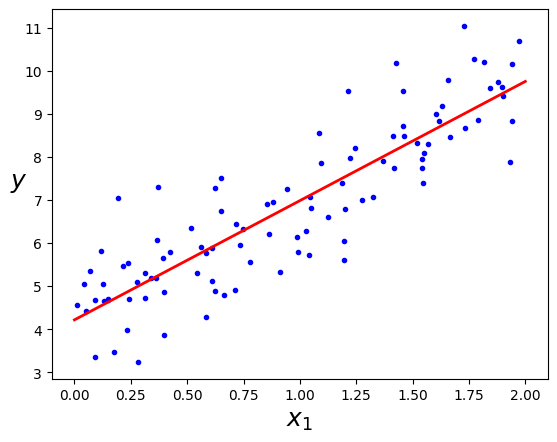

In [ ]:
import numpy as np

# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Parameters
learning_rate = 0.1
n_iterations = 1000
m = len(y)

# Initialize theta (parameters)
theta = np.random.randn(2, 1)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Theta (parameters):\n", theta)

# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
